In [5]:
forums.head()

,date,fid,tid,pg,pid,post_num,user,uid,text
0,2008-09-20 16:53:00 UTC+0000,116,362398,1,3988914,1,whisky 23,82186,Bobby woods has been given a date for the 23rd...
1,2008-09-20 17:02:00 UTC+0000,116,362398,1,3988936,2,JJS811,162116,Prayers offered to Bobby and his family and fr...
2,2008-10-18 13:06:00 UTC+0000,116,362398,1,4079385,3,whisky 23,82186,has anyone heard any news on Bobbies case
3,2008-10-18 15:15:00 UTC+0000,116,362398,1,4079552,4,ttopjenn29,50676,saying prayer's for him!
4,2008-10-18 16:48:00 UTC+0000,116,362398,1,4079695,5,JJS811,162116,DPIC say it is still going ahead.


In [6]:
cols_to_drop = ['date', 'pg', 'post_num', 'text']
forums.drop(cols_to_drop, axis=1, inplace=True)
forums.head()

,fid,tid,pid,user,uid
0,116,362398,3988914,whisky 23,82186
1,116,362398,3988936,JJS811,162116
2,116,362398,4079385,whisky 23,82186
3,116,362398,4079552,ttopjenn29,50676
4,116,362398,4079695,JJS811,162116


In [7]:
forum_cols = list(forums.columns)
forums = forums[forum_cols[-2:] + forum_cols[:3]]
forums.head()

,user,uid,fid,tid,pid
0,whisky 23,82186,116,362398,3988914
1,JJS811,162116,116,362398,3988936
2,whisky 23,82186,116,362398,4079385
3,ttopjenn29,50676,116,362398,4079552
4,JJS811,162116,116,362398,4079695


## TESTS

### USER TOTAL POSTS PER FORUM

In [8]:
z_wifey_forums = forums[forums['user'] == '"Z\'s"-Wifey']
z_wifey_forums = z_wifey_forums.groupby(['user', 'uid', 'fid'])['fid'].agg(['count']).reset_index()
z_wifey_forums.rename(columns={'count':'total_posts'}, inplace=True)
z_wifey_forums

,user,uid,fid,total_posts
0,"""Z's""-Wifey",138924,44,39
1,"""Z's""-Wifey",138924,94,1
2,"""Z's""-Wifey",138924,126,7
3,"""Z's""-Wifey",138924,928,1
4,"""Z's""-Wifey",138924,1506,3


### USER THREADS POSTED TO PER FORUM

In [12]:
z_wifey_unique = forums[forums['user'] == '"Z\'s"-Wifey']
z_wifey_unique = z_wifey_unique.groupby(['user', 'uid', 'fid', 'tid'])['tid'].agg(['count']).reset_index()
z_wifey_unique = z_wifey_unique.groupby(['user', 'uid', 'fid'])['fid'].agg(['count']).reset_index()
z_wifey_unique.rename(columns={'count':'unique_posts'}, inplace=True)
z_wifey_unique.head(30)

,user,uid,fid,unique_posts
0,"""Z's""-Wifey",138924,44,18
1,"""Z's""-Wifey",138924,94,1
2,"""Z's""-Wifey",138924,126,7
3,"""Z's""-Wifey",138924,928,1
4,"""Z's""-Wifey",138924,1506,3


In [13]:
z_wifey_merged = pd.merge(z_wifey_forums, z_wifey_unique[['uid', 'fid', 'unique_posts']], on=['uid', 'fid'])
z_wifey_merged

,user,uid,fid,total_posts,unique_posts
0,"""Z's""-Wifey",138924,44,39,18
1,"""Z's""-Wifey",138924,94,1,1
2,"""Z's""-Wifey",138924,126,7,7
3,"""Z's""-Wifey",138924,928,1,1
4,"""Z's""-Wifey",138924,1506,3,3


### USER TOTAL POSTS PER FORUM
##### HOW MANY POSTS DID EACH USER HAVE IN EACH FORUM

In [14]:
user_posts_forum = forums.groupby(['user', 'uid', 'fid'])['fid'].agg(['count']).reset_index()
user_posts_forum.rename(columns={'count':'total_posts'}, inplace=True)

In [15]:
# SANITY CHECK
print 'ROWS:', user_posts_forum.shape[0]
user_posts_forum[(user_posts_forum['user'] =='"Z\'s"-Wifey')]

ROWS: 255275


,user,uid,fid,total_posts
13,"""Z's""-Wifey",138924,44,39
14,"""Z's""-Wifey",138924,94,1
15,"""Z's""-Wifey",138924,126,7
16,"""Z's""-Wifey",138924,928,1
17,"""Z's""-Wifey",138924,1506,3


### USER UNIQUE POSTS AGGREGATED BY THREAD
##### HOW MANY THREADS DID EACH USER POST IN

In [16]:
# DEPRECATED
# user_unique_threads = forums.groupby(['user', 'fid']).agg({'fid': {'unique_threads':'count'}}).reset_index()
# user_unique_threads.columns = ['user', 'fid', 'total_posts']

# user_unique_threads = forums[forums['user'] == '"Z\'s"-Wifey']
user_unique_threads = forums.groupby(['user', 'uid', 'fid', 'tid'])['tid'].agg(['count']).reset_index()
user_unique_threads = user_unique_threads.groupby(['user', 'uid', 'fid'])['fid'].agg(['count']).reset_index()
user_unique_threads.rename(columns={'count':'unique_posts'}, inplace=True)

In [17]:
# SANITY CHECK
print 'ROWS:', user_unique_threads.shape[0]
user_unique_threads[user_unique_threads['user'] == '"Z\'s"-Wifey']

ROWS: 255275


,user,uid,fid,unique_posts
13,"""Z's""-Wifey",138924,44,18
14,"""Z's""-Wifey",138924,94,1
15,"""Z's""-Wifey",138924,126,7
16,"""Z's""-Wifey",138924,928,1
17,"""Z's""-Wifey",138924,1506,3


### MERGE TOTAL POSTS AND UNIQUE THREADS

In [18]:
user_activity = pd.merge(user_posts_forum, user_unique_threads[['uid', 'fid', 'unique_posts']], on=['uid', 'fid'])

In [19]:
# SANITY CHECK
print 'ROWS:', user_activity.shape[0]
user_activity[user_activity['user'] == '"Z\'s"-Wifey']

ROWS: 255275


,user,uid,fid,total_posts,unique_posts
13,"""Z's""-Wifey",138924,44,39,18
14,"""Z's""-Wifey",138924,94,1,1
15,"""Z's""-Wifey",138924,126,7,7
16,"""Z's""-Wifey",138924,928,1,1
17,"""Z's""-Wifey",138924,1506,3,3


### EXPORT TO CSV'S

##### EXPORT TOTAL POSTS IN EACH FORUM 

In [21]:
results_csv_dir = '../data/results/'
results_csv = 'user_posts_per_forum.csv'
user_posts_forum.to_csv(results_csv_dir + results_csv, index=False)

In [20]:
# SANITY CHECK
user_posts_per_forum = pd.read_csv('../data/results/user_posts_per_forum.csv')
print 'ROWS:', user_posts_per_forum.shape[0]
user_posts_per_forum[(user_posts_per_forum['user'] =='"Z\'s"-Wifey')]

ROWS: 255275


,user,uid,fid,total_posts
13,"""Z's""-Wifey",138924,44,39
14,"""Z's""-Wifey",138924,94,1
15,"""Z's""-Wifey",138924,126,7
16,"""Z's""-Wifey",138924,928,1
17,"""Z's""-Wifey",138924,1506,3


##### EXPORT TOTAL THREADS POSTED TO IN EACH FORUM

In [23]:
results_csv_dir = '../data/results/'
results_csv = 'user_threads_per_forum.csv'
user_unique_threads.to_csv(results_csv_dir + results_csv, index=False)

In [24]:
# SANITY CHECK
user_threads_per_forum = pd.read_csv('../data/results/user_threads_per_forum.csv')
print 'ROWS:', user_threads_per_forum.shape[0]
user_threads_per_forum[(user_threads_per_forum['user'] =='"Z\'s"-Wifey')]

ROWS: 255275


,user,uid,fid,unique_posts
13,"""Z's""-Wifey",138924,44,18
14,"""Z's""-Wifey",138924,94,1
15,"""Z's""-Wifey",138924,126,7
16,"""Z's""-Wifey",138924,928,1
17,"""Z's""-Wifey",138924,1506,3


##### EXPORT MERGED DATAFRAME

In [18]:
results_csv_dir = '../data/results/'
results_csv = 'user_posts_threads_aggregates.csv'
user_activity.to_csv(results_csv_dir + results_csv, index=False)

In [22]:
# SANITY CHECK
user_posts = pd.read_csv('../data/results/user_posts_threads_aggregates.csv')
print 'ROWS:', user_posts.shape[0]
user_posts[(user_posts['user'] =='"Z\'s"-Wifey')]

ROWS: 255275


,user,uid,fid,total_posts,unique_posts
13,"""Z's""-Wifey",138924,44,39,18
14,"""Z's""-Wifey",138924,94,1,1
15,"""Z's""-Wifey",138924,126,7,7
16,"""Z's""-Wifey",138924,928,1,1
17,"""Z's""-Wifey",138924,1506,3,3


## CALULATE ENTROPIES
#### TODO: NEEDS TO BE CLEANED UP TO MATCH NEW WORKFLOW

In [70]:
% matplotlib inline
import numpy as np
from scipy.stats import entropy
from math import log, e
import pandas as pd
import matplotlib.pyplot as plt

# FUNCTION FROM: https://stackoverflow.com/a/57400809/6023530
def calculate_user_entropy(column, base=None):
  vc = pd.Series(column).value_counts(normalize=True, sort=False)
  base = e if base is None else base
  return -(vc * np.log(vc)/np.log(base)).sum()

In [17]:
# results_csv_dir = '../data/results/'
# results_csv = 'activity_entropy.csv'
# user_activity = pd.read_csv(results_csv_dir + results_csv)
# print 'ROWS:', user_activity.shape[0]
# user_activity.head(10)

In [49]:
ua_rows = user_activity.shape[0]

users = user_activity[['user', 'uid']]
users_w_duplicates = users.shape[0]

users = users.drop_duplicates('uid') # NOTE: I MAY NEVER ACHIEVE UNDERSTANDING OF SettingWithCopyWarning SO DO THIS.
users_wo_duplicates = users.shape[0]

print 'USER_ACTIVITY ROWS:', ua_rows
print 'ENTROPY ROWS:', users_w_duplicates
print 'ENTROPY W/O DUPLICATES ROWS:', users_wo_duplicates

USER_ACTIVITY ROWS: 255275
ENTROPY ROWS: 255275
ENTROPY W/O DUPLICATES ROWS: 87022


In [83]:
# CREATE ENTROPY DATA FRAME W/ UNIQUE USER AND UID'S
# entropies = user_activity[['user', 'uid']]
# entropies = entropies.drop_duplicates('uid')
entropies.head()

,user,uid
0,!! His Queen !!,385930
2,!?clueless?!,80903
3,!NeverGiveUp!,386084
6,!Truth!,172736
7,"""DERRICK""",67803


In [84]:
wifey = user_activity[user_activity['user'] == '"Z\'s"-Wifey']
liating = user_activity[user_activity['user'] == 'Liating']

sample = pd.concat([wifey, liating]).reset_index(drop=True)
sample

,user,uid,fid,total_posts,unique_posts
0,"""Z's""-Wifey",138924,44,39,18
1,"""Z's""-Wifey",138924,94,1,1
2,"""Z's""-Wifey",138924,126,7,7
3,"""Z's""-Wifey",138924,928,1,1
4,"""Z's""-Wifey",138924,1506,3,3
5,Liating,487550,38,5,4
6,Liating,487550,44,24,18
7,Liating,487550,206,1,1
8,Liating,487550,412,4,3
9,Liating,487550,645,3,3


In [97]:
liating = users[users['user'] == 'Liating']
wifey = users[users['user'] == '"Z\'s"-Wifey']

In [98]:
sample_users = pd.concat([liating, wifey])#.reset_index()
sample_users = sample_users.drop_duplicates('uid').reset_index()
sample_users

,index,user,uid
0,61120,Liating,487550
1,13,"""Z's""-Wifey",138924


In [100]:
sample_entropies = sample.groupby('user')['total_posts'].apply(lambda user_posts: entropy(user_posts.values))
sample_entropies#.reset_index()

user
"Z's"-Wifey    0.798569
Liating        1.093040
Name: total_posts, dtype: float64

In [102]:
user_entropy_sample = pd.merge(sample_entropies, sample_users, on=['user'])
user_entropy_sample# = sample_entropies.drop('index')

,user,total_posts,index_x,uid_x,index_y,uid_y
0,"""Z's""-Wifey",0.798569,13,138924,13,138924
1,Liating,1.093040,61120,487550,61120,487550


In [104]:
sample_entropies.reset_index()

,level_0,user,total_posts,index,uid
0,0,"""Z's""-Wifey",0.798569,13,138924
1,1,Liating,1.093040,61120,487550


In [341]:
# CREATE ENTROPY DATA FRAME W/ UNIQUE USER AND UID'S
entropies = user_activity[['user', 'uid']]
entropies = entropies.drop_duplicates('uid')

entropies.head()

,user,uid
0,!! His Queen !!,385930
2,!?clueless?!,80903
3,!NeverGiveUp!,386084
6,!Truth!,172736
7,"""DERRICK""",67803


### TODO: RENAME NEW COLUMNS FOR MERGING

In [105]:
totals_entropies = user_activity.groupby('user')['total_posts'].apply(lambda group_series: entropy(group_series.tolist()))
entropies = pd.merge(entropies, totals_entropies, on=['user'])

In [106]:
unique_entropies = user_activity.groupby('user')['unique_posts'].apply(lambda group_series: entropy(group_series.tolist()))
entropies = pd.merge(entropies, unique_entropies, on=['user'])

In [112]:
log_totals_entropies = user_activity.groupby('user')['total_posts'].apply(lambda group_series: entropy(group_series.tolist(), base=10))
entropies = pd.merge(entropies, log_totals_entropies, on=['user'])

In [113]:
log_unique_entropies = user_activity.groupby('user')['unique_posts'].apply(lambda group_series: entropy(group_series.tolist(), base=10))
entropies = pd.merge(entropies, log_unique_entropies, on=['user'])

In [ ]:
base_two_totals_entropies = user_activity.groupby('user')['total_posts'].apply(lambda group_series: entropy(group_series.tolist(), base=10))
entropies = pd.merge(entropies, base_two_totals_entropies, on=['user'])

In [ ]:
base_two_unique_entropies = user_activity.groupby('user')['unique_posts'].apply(lambda group_series: entropy(group_series.tolist(), base=10))
entropies = pd.merge(entropies, base_two_unique_entropies, on=['user'])

In [117]:
# ONLY DUE TO COLUMNS ERROR ABOVE
# TODO: RENAME ABOVE
entropies = entropies[['user', 'uid', 'total_posts_x', 'unique_posts_x', 'total_posts', 'unique_posts']]
entropies.columns = ['user', 'uid', 
                     'posts_log_e', 'threads_log_e', 
                     'posts_log_10', 'threads_log_10',
                     'posts_base_2', 'threads_base_2'
                    ]
entropies.head()

,user,uid,posts_log_e,threads_log_e,posts_log_10,threads_log_10
0,!! His Queen !!,385930,0.693147,0.693147,0.301030,0.301030
1,!?clueless?!,80903,0.000000,0.000000,0.000000,0.000000
2,!NeverGiveUp!,386084,0.683739,1.039721,0.296944,0.451545
3,!Truth!,172736,0.000000,0.000000,0.000000,0.000000
4,"""DERRICK""",67803,0.000000,0.000000,0.000000,0.000000


In [118]:
results_csv_dir = '../data/results/'
entropies_csv = 'entropies.csv'
entropies.to_csv(results_csv_dir + entropies_csv, index=False)

### USER ACTIVITY SUMMATION

In [129]:
user_activity_sums = user_activity.groupby(['user', 'uid'], as_index=False).sum()
user_activity_sums = user_activity_sums[['user', 'uid', 'total_posts', 'unique_posts']]
user_activity_sums.columns = ['user', 'uid', 'posts', 'threads']
user_activity_sums.head()

,user,uid,posts,threads
0,!! His Queen !!,385930,2,2
1,!?clueless?!,80903,1,1
2,!NeverGiveUp!,386084,9,4
3,!Truth!,172736,3,2
4,"""DERRICK""",67803,1,1


#### SANITY CHECK

In [131]:
# # SANITY CHECK
# liating = user_activity_sums['user'] == 'Liating'
# wifey = user_activity_sums['user'] == '"Z\'s"-Wifey'
# user_activity_sums[wifey | liating]

In [132]:
results_csv_dir = '../data/results/'
csv_file = 'user_activity_sums.csv'
user_activity_sums.to_csv(results_csv_dir + csv_file, index=False)

In [135]:
activity_entropy = pd.merge(entropies, user_activity_sums, on=['user', 'uid'])
activity_entropy.head()

,user,uid,posts_log_e,threads_log_e,posts_log_10,threads_log_10,posts,threads
0,!! His Queen !!,385930,0.693147,0.693147,0.301030,0.301030,2,2
1,!?clueless?!,80903,0.000000,0.000000,0.000000,0.000000,1,1
2,!NeverGiveUp!,386084,0.683739,1.039721,0.296944,0.451545,9,4
3,!Truth!,172736,0.000000,0.000000,0.000000,0.000000,3,2
4,"""DERRICK""",67803,0.000000,0.000000,0.000000,0.000000,1,1


In [197]:
normed = activity_entropy.copy()
normed = normed[normed.columns[1:]]
# normed = normed.set_index('uid')
normed['posts'] = normed['posts'] - normed['posts'].mean())/normed['posts'].std()
normed['threads'] = normed['threads'] - normed['threads'].mean())/normed['threads'].std()



for column in activity_entropy.columns[2:]:
    normed[column] = (normed[column] - normed[column].mean())/normed[column].std()
    
# normed  = (normed - normed.mean())/normed.std()
# normed.head()
normed.head()

,posts_log_e,threads_log_e,posts_log_10,threads_log_10,posts,threads
uid,,,,,,
385930,0.300344,0.257220,0.300344,0.257220,-0.125430,-0.123868
80903,-0.821127,-0.830138,-0.821127,-0.830138,-0.129824,-0.130545
386084,0.285122,0.800899,0.285122,0.800899,-0.094669,-0.110513
172736,-0.821127,-0.830138,-0.821127,-0.830138,-0.121035,-0.123868
67803,-0.821127,-0.830138,-0.821127,-0.830138,-0.129824,-0.130545


In [227]:
import pandas as pd
from sklearn import preprocessing

normed = activity_entropy.copy()
normed = normed[normed.columns[1:]]
normed = normed.set_index('uid')

x = normed.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normed = pd.DataFrame(x_scaled)
normed.columns = activity_entropy.columns[2:]
# normed.sort_values(by='posts', ascending=False).head()
normed.head()

,posts_log_e,threads_log_e,posts_log_10,threads_log_10,posts,threads
0,0.226944,0.22484,0.226944,0.22484,0.000039,0.000066
1,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
2,0.223864,0.33726,0.223864,0.33726,0.000315,0.000198
3,0.000000,0.00000,0.000000,0.00000,0.000079,0.000066
4,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000


In [176]:
normed.sort_values(by='posts', ascending=False).head()

,posts_log_e,threads_log_e,posts_log_10,threads_log_10,posts,threads
75651,1.092173,1.767852,1.092173,1.767852,111.386180,49.228483
27606,2.387273,2.228990,2.387273,2.228990,84.127884,77.086420
19050,0.842052,0.704342,0.842052,0.704342,67.754450,101.218390
72640,1.902883,1.434096,1.902883,1.434096,58.135168,64.085604
50436,2.309416,2.017690,2.309416,2.017690,53.973697,70.282192


#### SANITY CHECK

In [138]:
# # SANITY CHECK
# liating = user_activity_sums['user'] == 'Liating'
# wifey = user_activity_sums['user'] == '"Z\'s"-Wifey'
# activity_entropy[wifey | liating]

#### EXPORT ACTIVITY_ENTROPY

In [137]:
results_csv_dir = '../data/results/'
csv_file = 'activity_entropy.csv'
activity_entropy.to_csv(results_csv_dir + csv_file, index=False)

## PLOTS

### DISTRIBUTIONS

Text(0,0.5,'number of users')

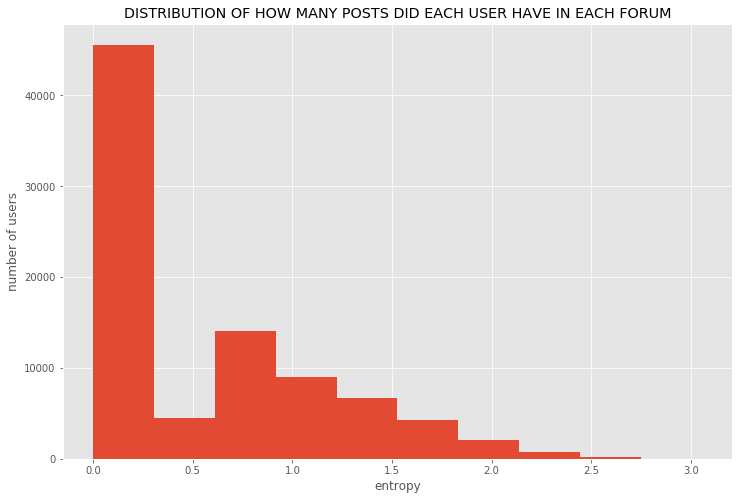

In [358]:
hist_totals = entropies['total_posts'].hist(figsize=(12,8))
hist_totals.set_title('DISTRIBUTION OF HOW MANY POSTS DID EACH USER HAVE IN EACH FORUM')
hist_totals.set_xlabel("entropy")
hist_totals.set_ylabel("number of users")

Text(0,0.5,'number of users')

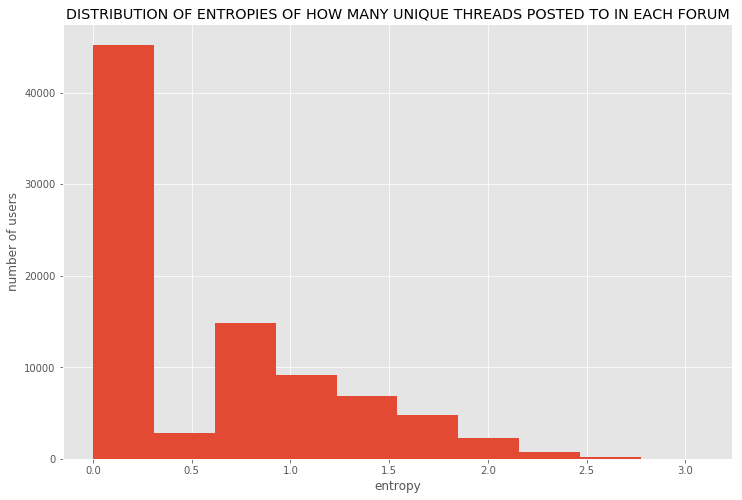

In [360]:
hist_unique = entropies['unique_posts'].hist(figsize=(12,8))
hist_unique.set_title('DISTRIBUTION OF ENTROPIES OF HOW MANY UNIQUE THREADS POSTED TO IN EACH FORUM')
hist_unique.set_xlabel("entropy")
hist_unique.set_ylabel("number of users")

In [ ]:
X axis number of posts, entropy
X axis number of posts, and log entropy

the confounding factor is how active you are
heatmap

suggest starting to write
create infrastructure

### HEATMAPS

In [25]:
# SANITY CHECK
user_activity = pd.read_csv('../data/results/user_posts_threads_aggregates.csv')
print 'ROWS:', user_activity.shape[0]
# SANITY CHECK
user_activity[(user_activity['user'] =='"Z\'s"-Wifey')]

ROWS: 255275


,user,uid,fid,total_posts,unique_posts
13,"""Z's""-Wifey",138924,44,39,18
14,"""Z's""-Wifey",138924,94,1,1
15,"""Z's""-Wifey",138924,126,7,7
16,"""Z's""-Wifey",138924,928,1,1
17,"""Z's""-Wifey",138924,1506,3,3


In [42]:
results_csv_dir = '../data/results/'
results_csv = 'activity_entropy.csv'
entropies = pd.read_csv(results_csv_dir + results_csv)
print 'ROWS:', user_activity.shape[0]
entropies.head()

ROWS: 255275


,user,uid,posts_log_e,threads_log_e,posts_log_10,threads_log_10,posts,threads
0,!! His Queen !!,385930,0.693147,0.693147,0.301030,0.301030,2,2
1,!?clueless?!,80903,0.000000,0.000000,0.000000,0.000000,1,1
2,!NeverGiveUp!,386084,0.683739,1.039721,0.296944,0.451545,9,4
3,!Truth!,172736,0.000000,0.000000,0.000000,0.000000,3,2
4,"""DERRICK""",67803,0.000000,0.000000,0.000000,0.000000,1,1


DOING BASE TWO HERE TO  ADD TO ENTROPIES <br>
IT IS ALSO ABOVE AS WELL WITH THE OTHER ENTROPY CALCULATIONS

In [48]:
base_two_totals_entropies = user_activity.groupby('user')['total_posts'].apply(lambda group_series: entropy(group_series.tolist(), base=2.0))
base_two_totals_entropies.rename('posts_base_2', inplace=True)
entropies = pd.merge(entropies, base_two_totals_entropies, on=['user'])

In [52]:
base_two_unique_entropies = user_activity.groupby('user')['unique_posts'].apply(lambda group_series: entropy(group_series.tolist(), base=2.0))
base_two_unique_entropies.rename('threads_base_2', inplace=True)
entropies = pd.merge(entropies, base_two_unique_entropies, on=['user'])

In [53]:
entropies.head()

,user,uid,posts_log_e,threads_log_e,posts_log_10,threads_log_10,posts,threads,posts_base_2,threads_base_2
0,!! His Queen !!,385930,0.693147,0.693147,0.301030,0.301030,2,2,1.000000,1.0
1,!?clueless?!,80903,0.000000,0.000000,0.000000,0.000000,1,1,0.000000,0.0
2,!NeverGiveUp!,386084,0.683739,1.039721,0.296944,0.451545,9,4,0.986427,1.5
3,!Truth!,172736,0.000000,0.000000,0.000000,0.000000,3,2,0.000000,0.0
4,"""DERRICK""",67803,0.000000,0.000000,0.000000,0.000000,1,1,0.000000,0.0


In [66]:
cols = list(entropies.columns)
cols = cols[:6] + cols[-2:] + cols[6:8]
entropies = entropies[cols]
entropies.head()

,user,uid,posts_log_e,threads_log_e,posts_log_10,threads_log_10,posts_base_2,threads_base_2,posts,threads
0,!! His Queen !!,385930,0.693147,0.693147,0.301030,0.301030,1.000000,1.0,2,2
1,!?clueless?!,80903,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,1
2,!NeverGiveUp!,386084,0.683739,1.039721,0.296944,0.451545,0.986427,1.5,9,4
3,!Truth!,172736,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3,2
4,"""DERRICK""",67803,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1,1


In [68]:
results_csv_dir = '../data/results/'
csv_file = 'activity_entropy.csv'
entropies.to_csv(results_csv_dir + csv_file, index=False)

In [94]:
entropies['posts_base_2'][entropies['posts'] >= 3].describe()

count    43004.000000
mean         1.354488
std          0.855571
min          0.000000
25%          0.811278
50%          1.392147
75%          1.938849
max          4.406374
Name: posts_base_2, dtype: float64

In [92]:
entropies['posts'][entropies['posts_base_2'] >= .25].describe()

count    41912.000000
mean        60.670572
std        320.592030
min          2.000000
25%          4.000000
50%          9.000000
75%         28.000000
max      25378.000000
Name: posts, dtype: float64

count    87022.000000
mean         0.732187
std          0.891686
min          0.000000
25%          0.000000
50%          0.000000
75%          1.378783
max          4.406374
Name: posts_base_2, dtype: float64

In [ ]:
count    87022.000000
mean        30.543230
std        227.563749
min          1.000000
25%          1.000000
50%          2.000000
75%          9.000000
max      25378.000000
Name: posts, dtype: float64

### NORMALIZING WHOLE FRAME BASE 2

In [141]:
normed_entropies = entropies[entropies['posts'] >= 3].copy()
normed_entropies = normed_entropies[['posts_base_2', 'posts']]
# normed_entropies = (normed_entropies - normed_entropies.mean())/normed_entropies.std()
normed_entropies = (normed_entropies - normed_entropies.min())/(normed_entropies.max() - normed_entropies.min())
# normed_entropies['posts_base_2'] = (normed_entropies['posts_base_2'] - normed_entropies['posts_base_2'].min())/(normed_entropies['posts_base_2'].max() - normed_entropies['posts_base_2'].min())
# normed_entropies['posts'] = (normed_entropies['posts'] - normed_entropies['posts'].min())/(normed_entropies['posts'].max() - normed_entropies['posts'].min())

normed_entropies.describe()

,posts_base_2,posts
count,43004.000000,43004.000000
mean,0.307393,0.002265
std,0.194167,0.012649
min,0.000000,0.000000
25%,0.184115,0.000039
50%,0.315939,0.000236
75%,0.440010,0.000946
max,1.000000,1.000000


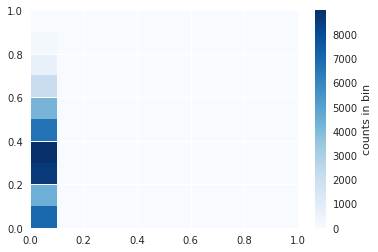

In [145]:
# xbins = np.logspace(normed_entropies['posts'].min(), normed_entropies['posts'].max(), 10) # <- make a range from 10**xmin to 10**xmax
# ybins = np.logspace(normed_entropies['posts_base_2'].min(), normed_entropies['posts_base_2'].max(), 10) # <- make a range from 10**ymin to 10**ymax

plt.hist2d(normed_entropies['posts'], normed_entropies['posts_base_2'], bins=10, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

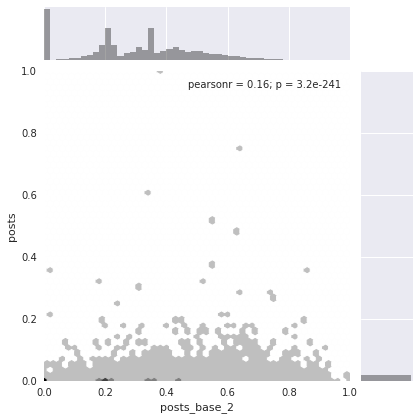

In [143]:
import seaborn as sns

sns.set(color_codes=True)

posts = normed_entropies['posts']
entropy = normed_entropies['posts_base_2']
sns.jointplot(x=entropy, y=posts, kind="hex", color="k", bins=5);

#### TOTAL POSTS VS. ENTROPY BASE E

In [238]:
normed = activity_entropy.copy()
normed = normed[normed.columns[1:]]
# normed = normed.set_index('uid')
normed['posts'] = (normed['posts'] - normed['posts'].mean())/normed['posts'].std()
normed['threads'] = (normed['threads'] - normed['threads'].mean())/normed['threads'].std()
normed.head()

,uid,posts_log_e,threads_log_e,posts_log_10,threads_log_10,posts,threads
0,385930,0.693147,0.693147,0.301030,0.301030,-0.125430,-0.123868
1,80903,0.000000,0.000000,0.000000,0.000000,-0.129824,-0.130545
2,386084,0.683739,1.039721,0.296944,0.451545,-0.094669,-0.110513
3,172736,0.000000,0.000000,0.000000,0.000000,-0.121035,-0.123868
4,67803,0.000000,0.000000,0.000000,0.000000,-0.129824,-0.130545


In [240]:
# >>> df.pivot(index='foo', columns='bar', values='baz')
# bar  A   B   C
# foo
# one  1   2   3
# two  4   5   6

# posts_e = normed[['posts', 'posts_log_e']]
# # posts_e = posts_e.sort_values(by='posts', ascending=False)
# # posts_e = posts_e.set_index('posts')

posts_e = normed.pivot(columns='posts', values='posts_log_e')
posts_e = posts_e.fillna(0)
posts_e.head()

posts,-0.129823974902,-0.125429601878,-0.121035228855,-0.116640855831,-0.112246482808,-0.107852109785,-0.103457736761,-0.099063363738,-0.0946689907146,-0.0902746176912,...,35.6491611814,36.5631907702,39.4590825926,39.9995904745,41.8671990094,53.9736966888,58.135167942,67.7544504901,84.1278843752,111.386180239
0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.683739,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


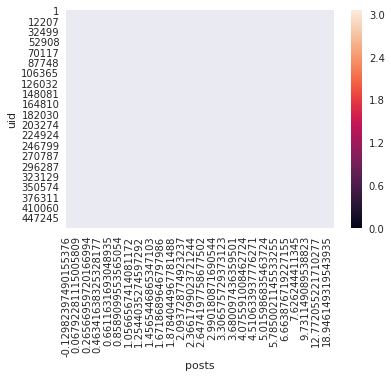

In [236]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline


# plot heatmap
ax = sns.heatmap(posts_e)

# # turn the axis label
# for item in ax.get_yticklabels():
#     item.set_rotation(0)

# for item in ax.get_xticklabels():
#     item.set_rotation(90)

# # save figure
# plt.savefig('seabornPandas.png', dpi=100)
plt.show()

In [ ]:
import pandas as pd
from sklearn import preprocessing

normed = activity_entropy.copy()
normed = normed[normed.columns[1:]]
normed = normed.set_index('uid')

x = normed.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normed = pd.DataFrame(x_scaled)
normed.columns = activity_entropy.columns[2:]
# normed.sort_values(by='posts', ascending=False).head()
normed.head()

In [ ]:
posts_e = normed.pivot(index='uid', columns='posts', values='posts_log_e')
posts_e = posts_e.fillna(0)
posts_e.head()